In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(647, 593, 3)


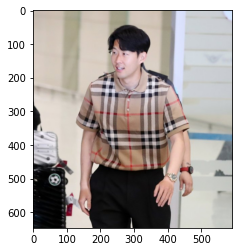

In [2]:
# 이미지 로드 및 확인
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/son.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# 모델 다운로드
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7e4c8c873310>)

In [6]:
# 모델 로드
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [13]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

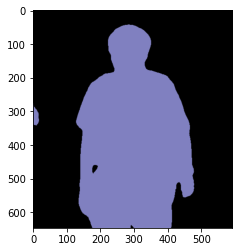

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [8]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

(647, 593)


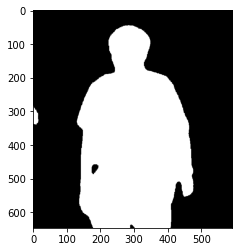

In [12]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

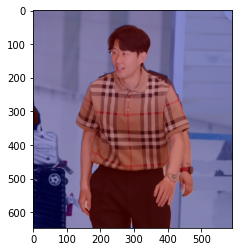

In [13]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

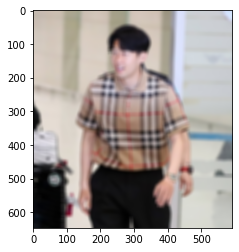

In [14]:
# 흐리게 만들기
img_orig_blur = cv2.blur(img_orig, (13,13))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

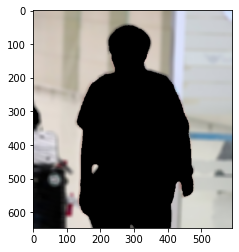

In [15]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

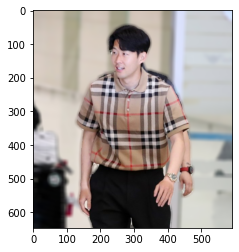

In [16]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(628, 1000, 3)


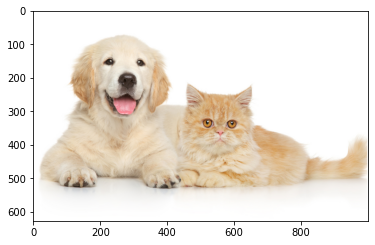

In [116]:
# 고양이 segmentation
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog.png'  
img_cat = cv2.imread(img_path) 

print(img_cat.shape)

plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [117]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [118]:
colormap[8] # 고양이 칼러맵

array([64,  0,  0])

In [119]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


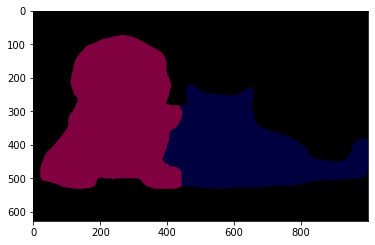

In [120]:
plt.imshow(output)
plt.show()

In [121]:
seg_color = (0,0,64) 

(628, 1000)


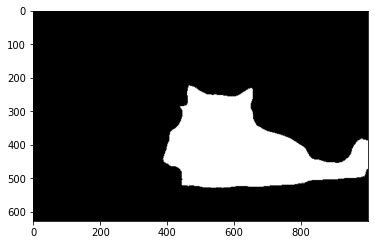

In [122]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

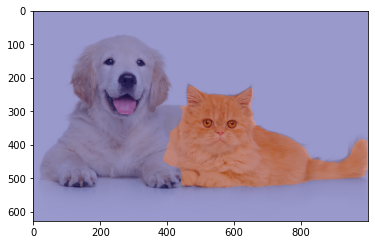

In [123]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_cat.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

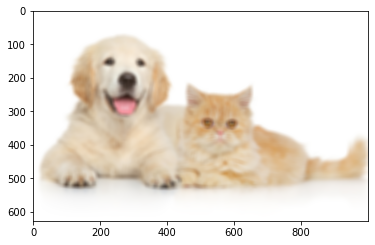

In [124]:
img_cat_blur = cv2.blur(img_cat, (13,13))
  
plt.imshow(cv2.cvtColor(img_cat_blur, cv2.COLOR_BGR2RGB))
plt.show()

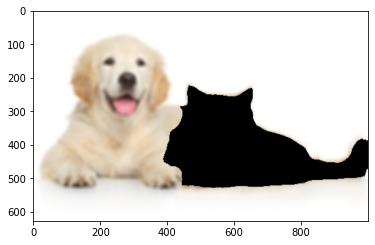

In [125]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_cat_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

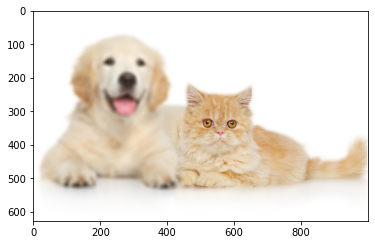

In [126]:
img_concat = np.where(img_mask_color==255, img_cat, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(420, 640, 3)


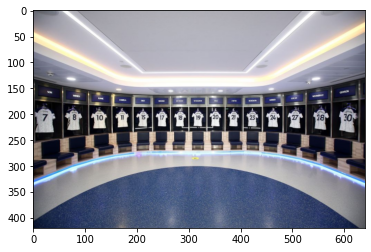

In [17]:
# 배경 바꾸기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/room.png'  
img_new_bg = cv2.imread(img_path) 

print(img_new_bg.shape)

plt.imshow(cv2.cvtColor(img_new_bg, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
# 사이즈 조정
img_orig.shape

(647, 593, 3)

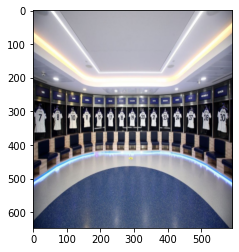

In [19]:
img_new_bg_resized = cv2.resize(img_new_bg, (img_orig.shape[1], img_orig.shape[0]))
plt.imshow(cv2.cvtColor(img_new_bg_resized, cv2.COLOR_BGR2RGB))
plt.show()

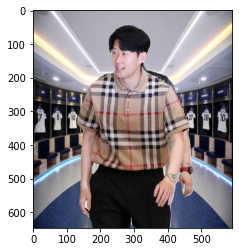

In [20]:
img_concat = np.where(img_mask_color==255, img_orig, img_new_bg_resized)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

![Check Output](check_output.png)

In [92]:
# 모델변경
# 문제점 1. 겹쳐 있는 사람 구분 못함
# 문제점 2. segmentation이 정밀하게 이뤄지지 못함
# 문제점 3. 사람이 가지고 있는 객체를 구분 못함

# DeepLabV3 : Semantic Segmentation, 개별 객체 구분이 불가능
# Mask R-CNN : Instance Segmentation, 개별 객체 식별하고 마스크 제공

In [91]:
from pixellib.instance import instance_segmentation

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, "mask_rcnn_coco.h5") 

segment_image = instance_segmentation()
segment_image.load_model(model_file)

Instructions for updating:
Use fn_output_signature instead


In [93]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/son.png'  
output_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/output.png'

In [94]:
segment_image.segmentImage(img_path, output_image_name = output_path)

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'rois': array([[ 38, 126, 639, 474],
         [464, 463, 486, 476],
         [486, 406, 508, 426],
         [325,   0, 644, 131],
         [268,   0, 362,  27]], dtype=int32),
  'class_ids': array([ 1, 75, 75,  4,  1], dtype=int32),
  'scores': array([0.9999865 , 0.7927964 , 0.75855774, 0.74723047, 0.73552877],
        dtype=float32),
  'masks': array([[[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False, False, False],
   

(647, 593, 3)


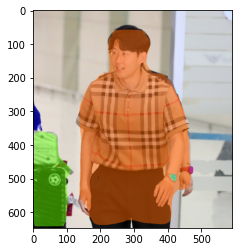

In [95]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/output.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [96]:
# 겹치는 부분을 개별인식하여 구분할것으로 기대했지만 좋은 성능을 보이지못함.

(579, 744, 3)


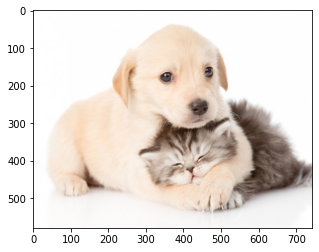

In [119]:
# 고양이 segmentation
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_2.png'  
img_cat_dog = cv2.imread(img_path) 

print(img_cat_dog.shape)

plt.imshow(cv2.cvtColor(img_cat_dog, cv2.COLOR_BGR2RGB))
plt.show()

In [120]:
segvalues, output = model.segmentAsPascalvoc(img_path)

cat_colormap = colormap[8]
dog_colormap = colormap[12]

In [121]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


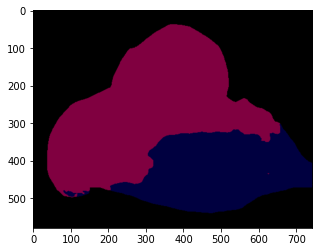

In [122]:
plt.imshow(output)
plt.show()

In [123]:
print("cat : ", cat_colormap)
print("dog : ", dog_colormap)

cat :  [64  0  0]
dog :  [ 64   0 128]


(579, 744)


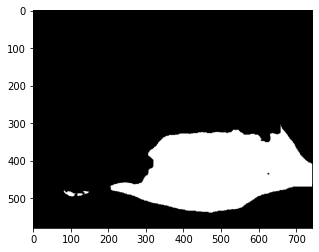

In [124]:
cat_color = (0,0,64)

cat_seg_map = np.all(output==cat_color, axis=-1) 
print(cat_seg_map.shape) 
plt.imshow(cat_seg_map, cmap='gray')
plt.show()

(579, 744)


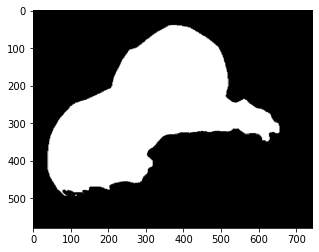

In [125]:
dog_color = (128,0,64)

dog_seg_map = np.all(output==dog_color, axis=-1) 
print(dog_seg_map.shape) 
plt.imshow(dog_seg_map, cmap='gray')
plt.show()

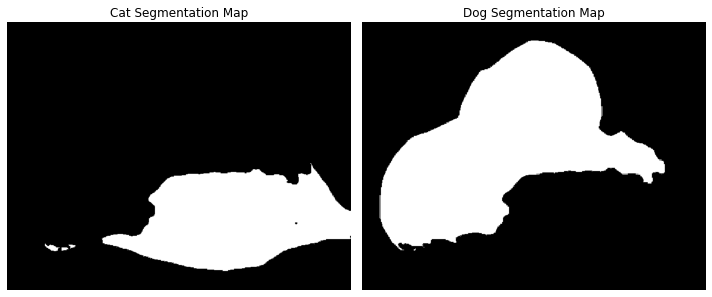

In [126]:
# 고양이와 개의 색상 정의
cat_color = (0, 0, 64)
dog_color = (128, 0, 64)

# 고양이와 개의 Segmentation Map 생성
cat_seg_map = np.all(output == cat_color, axis=-1)
dog_seg_map = np.all(output == dog_color, axis=-1)

# Segmentation Map 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열로 출력

# 고양이 Segmentation Map 표시
axes[0].imshow(cat_seg_map, cmap='gray')
axes[0].set_title('Cat Segmentation Map')
axes[0].axis('off')  # 축 제거

# 개 Segmentation Map 표시
axes[1].imshow(dog_seg_map, cmap='gray')
axes[1].set_title('Dog Segmentation Map')
axes[1].axis('off')  # 축 제거

# 전체 레이아웃 조정 후 표시
plt.tight_layout()
plt.show()


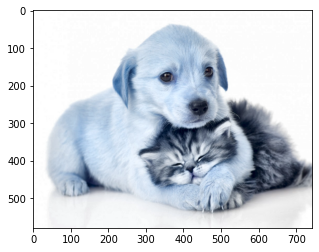

In [127]:
# 데이터 전처리 1
# 히스토그램 평활화
# 히스토그램 평활화 : 이미지 밝기를 조정하여 더 뚜렷한 대비를 만드는 기법.
# 어두운 부분은 더밝게, 밝은 부분은 더 선명하게 만들어서 품질 개선

def apply_histogram_equalization(img):
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(img_lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    
    # 경계 보존 처리
    l_eq = cv2.copyMakeBorder(l_eq, 0, 0, 0, 0, cv2.BORDER_REPLICATE)
    
    img_lab_eq = cv2.merge((l_eq, a, b))
    img_eq = cv2.cvtColor(img_lab_eq, cv2.COLOR_LAB2BGR)
    return img_eq

img_eq = apply_histogram_equalization(img_cat_dog)
cv2.imwrite('images/cat_dog_eq.png', img_eq)

plt.imshow(img_eq)
plt.show()

In [128]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_2.png'  
img_eq = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_eq.png'  

In [129]:
segvalues_original, output_original = model.segmentAsPascalvoc(img_path)
segvalues_eq, output_eq = model.segmentAsPascalvoc(img_eq)

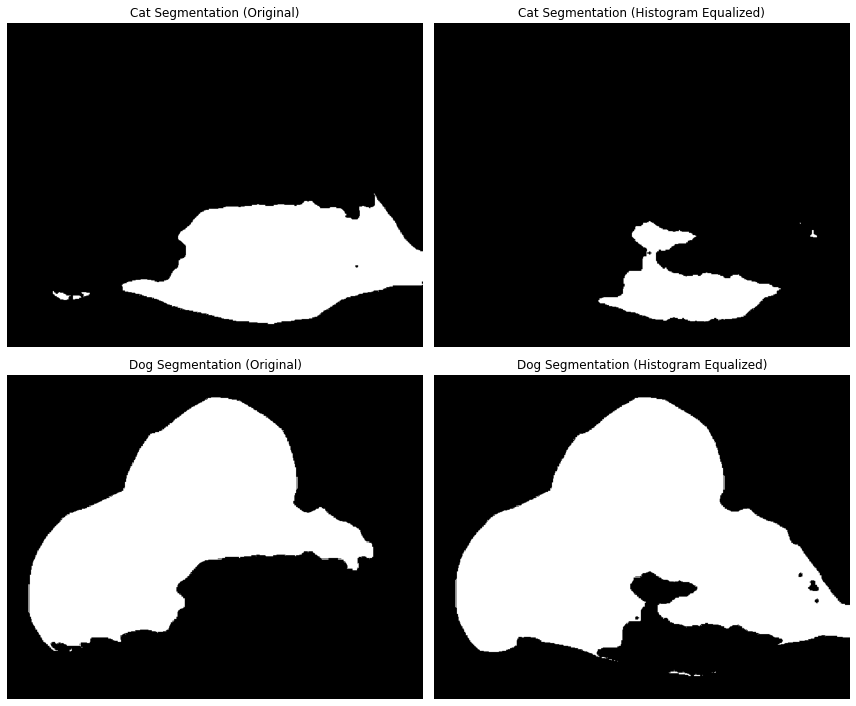

In [130]:
# 고양이와 개의 색상 정의
cat_color = (0, 0, 64)
dog_color = (128, 0, 64)

# 원본 이미지의 Segmentation Map 생성
cat_seg_map_original = np.all(output_original == cat_color, axis=-1)
dog_seg_map_original = np.all(output_original == dog_color, axis=-1)

# 히스토그램 평활화 이미지의 Segmentation Map 생성
cat_seg_map_eq = np.all(output_eq == cat_color, axis=-1)
dog_seg_map_eq = np.all(output_eq == dog_color, axis=-1)

# Segmentation Map 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2행 2열로 출력

# 고양이 - 원본 이미지
axes[0, 0].imshow(cat_seg_map_original, cmap='gray')
axes[0, 0].set_title('Cat Segmentation (Original)')
axes[0, 0].axis('off')

# 고양이 - 히스토그램 평활화 이미지
axes[0, 1].imshow(cat_seg_map_eq, cmap='gray')
axes[0, 1].set_title('Cat Segmentation (Histogram Equalized)')
axes[0, 1].axis('off')

# 개 - 원본 이미지
axes[1, 0].imshow(dog_seg_map_original, cmap='gray')
axes[1, 0].set_title('Dog Segmentation (Original)')
axes[1, 0].axis('off')

# 개 - 히스토그램 평활화 이미지
axes[1, 1].imshow(dog_seg_map_eq, cmap='gray')
axes[1, 1].set_title('Dog Segmentation (Histogram Equalized)')
axes[1, 1].axis('off')

# 전체 레이아웃 조정 후 표시
plt.tight_layout()
plt.show()

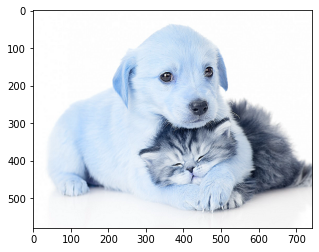

In [131]:
# 데이터 전처리 2
# sharpening 적용
# 샤프닝 : 이미지의 경계(Edge)를 강조하서 더 선명하게 만드는 기법

def apply_sharpening(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    # 가장자리 보정 (Padding 처리)
    sharpened_img = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_DEFAULT)
    return sharpened_img

img_sharp = apply_sharpening(img_cat_dog)
cv2.imwrite('images/cat_dog_sharp.png', img_sharp)

plt.imshow(img_sharp)
plt.show()

In [132]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_2.png'  
img_sharp = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_sharp.png'

In [133]:
segvalues_original, output_original = model.segmentAsPascalvoc(img_path)
segvalues_sharp, output_sharp = model.segmentAsPascalvoc(img_sharp)

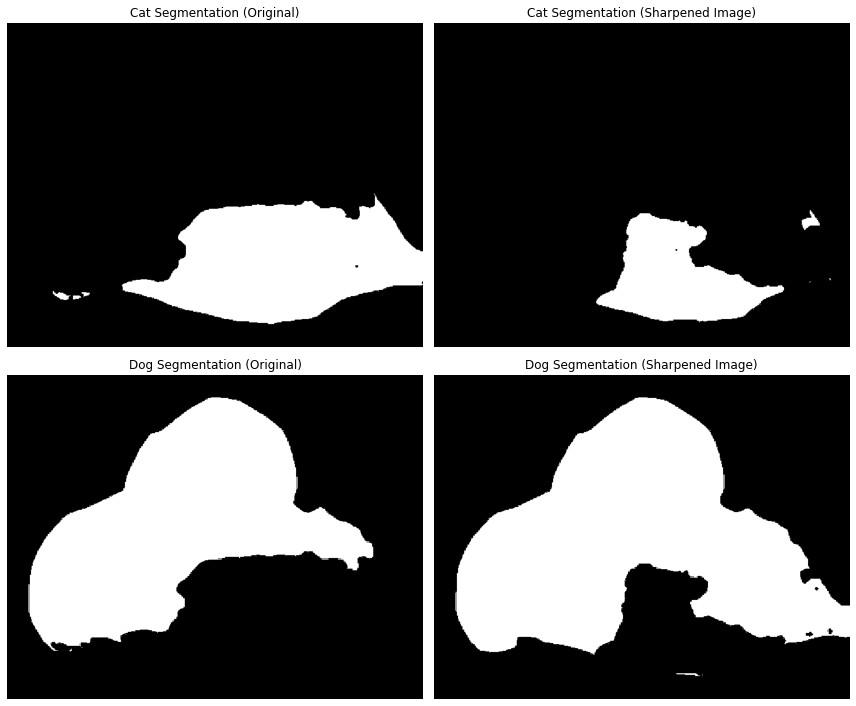

In [134]:
# 고양이와 개의 색상 정의
cat_color = (0, 0, 64)
dog_color = (128, 0, 64)

# 원본 이미지의 Segmentation Map 생성
cat_seg_map_original = np.all(output_original == cat_color, axis=-1)
dog_seg_map_original = np.all(output_original == dog_color, axis=-1)

# 히스토그램 평활화 이미지의 Segmentation Map 생성
cat_seg_map_sharp = np.all(output_sharp == cat_color, axis=-1)
dog_seg_map_sharp = np.all(output_sharp == dog_color, axis=-1)

# Segmentation Map 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2행 2열로 출력

# 고양이 - 원본 이미지
axes[0, 0].imshow(cat_seg_map_original, cmap='gray')
axes[0, 0].set_title('Cat Segmentation (Original)')
axes[0, 0].axis('off')

# 고양이 - 히스토그램 평활화 이미지
axes[0, 1].imshow(cat_seg_map_sharp, cmap='gray')
axes[0, 1].set_title('Cat Segmentation (Sharpened Image)')
axes[0, 1].axis('off')

# 개 - 원본 이미지
axes[1, 0].imshow(dog_seg_map_original, cmap='gray')
axes[1, 0].set_title('Dog Segmentation (Original)')
axes[1, 0].axis('off')

# 개 - 히스토그램 평활화 이미지
axes[1, 1].imshow(dog_seg_map_sharp, cmap='gray')
axes[1, 1].set_title('Dog Segmentation (Sharpened Image)')
axes[1, 1].axis('off')

# 전체 레이아웃 조정 후 표시
plt.tight_layout()
plt.show()

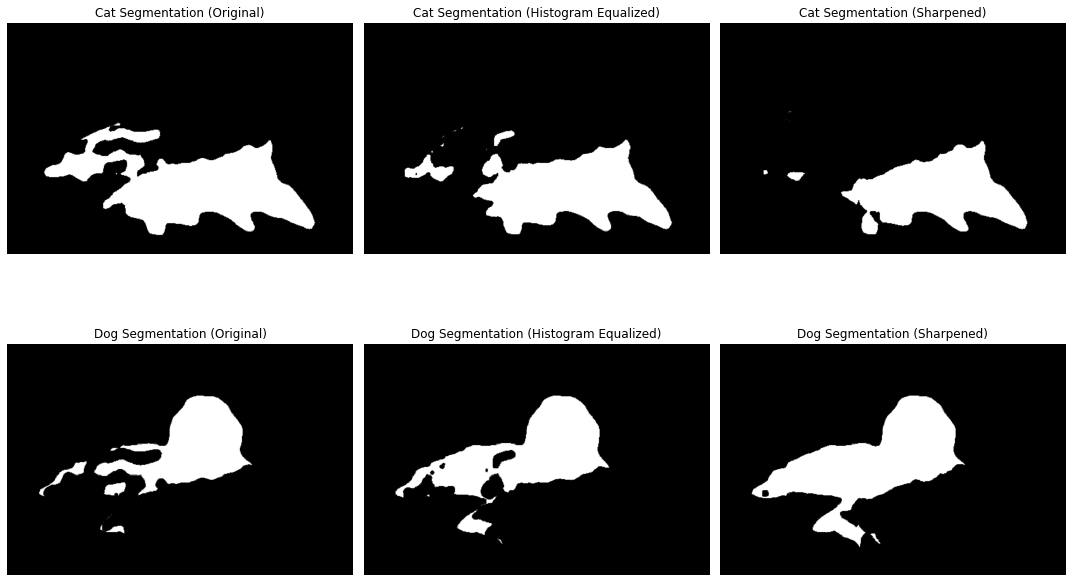

In [137]:
# 사진 변경
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_3.png' 
img_cat_dog = cv2.imread(img_path) 

img_eq = apply_histogram_equalization(img_cat_dog)
cv2.imwrite('images/cat_dog_eq_3.png', img_eq)
img_sharp = apply_sharpening(img_cat_dog)
cv2.imwrite('images/cat_dog_sharp_3.png', img_sharp)

 
img_eq = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_eq_3.png'
img_sharp = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog_sharp_3.png'

segvalues_original, output_original = model.segmentAsPascalvoc(img_path)
segvalues_eq, output_eq = model.segmentAsPascalvoc(img_eq)
segvalues_sharp, output_sharp = model.segmentAsPascalvoc(img_sharp)

# Segmentation Map 생성
def get_segmentation_maps(output):
    cat_seg_map = np.all(output == cat_color, axis=-1)
    dog_seg_map = np.all(output == dog_color, axis=-1)
    return cat_seg_map, dog_seg_map

cat_seg_map_original, dog_seg_map_original = get_segmentation_maps(output_original)
cat_seg_map_eq, dog_seg_map_eq = get_segmentation_maps(output_eq)
cat_seg_map_sharp, dog_seg_map_sharp = get_segmentation_maps(output_sharp)

# 시각화 (2행 3열 레이아웃: 고양이와 개를 각각 비교)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 고양이 - 원본 이미지
axes[0, 0].imshow(cat_seg_map_original, cmap='gray')
axes[0, 0].set_title('Cat Segmentation (Original)')
axes[0, 0].axis('off')

# 고양이 - 히스토그램 평활화
axes[0, 1].imshow(cat_seg_map_eq, cmap='gray')
axes[0, 1].set_title('Cat Segmentation (Histogram Equalized)')
axes[0, 1].axis('off')

# 고양이 - 샤프닝 적용
axes[0, 2].imshow(cat_seg_map_sharp, cmap='gray')
axes[0, 2].set_title('Cat Segmentation (Sharpened)')
axes[0, 2].axis('off')

# 개 - 원본 이미지
axes[1, 0].imshow(dog_seg_map_original, cmap='gray')
axes[1, 0].set_title('Dog Segmentation (Original)')
axes[1, 0].axis('off')

# 개 - 히스토그램 평활화
axes[1, 1].imshow(dog_seg_map_eq, cmap='gray')
axes[1, 1].set_title('Dog Segmentation (Histogram Equalized)')
axes[1, 1].axis('off')

# 개 - 샤프닝 적용
axes[1, 2].imshow(dog_seg_map_sharp, cmap='gray')
axes[1, 2].set_title('Dog Segmentation (Sharpened)')
axes[1, 2].axis('off')

# 레이아웃 조정 후 표시
plt.tight_layout()
plt.show()

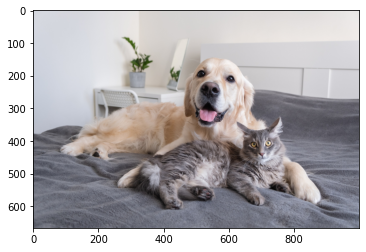

In [138]:
plt.imshow(cv2.cvtColor(img_cat_dog, cv2.COLOR_BGR2RGB))
plt.show()

### Human Segmentation 실험 결과



#### 1. Semantic Segmentation 시 발생한 문제점

1. **겹쳐 있는 사람 구분 불가**  
   - 서로 겹쳐 있는 사람들을 개별적으로 식별하는 데 한계가 있음.

2. **Segmentation 정밀도 부족**  
   - 경계선이 모호하여 정밀한 객체 분할이 어려움.

3. **사람이 가진 객체를 구분하지 못함**  
   - 사람이 들고 있는 가방, 손목시계 등의 객체를 사람과 별도로 인식하지 못함.



#### 2. 문제 해결을 위한 시도

##### 1) Instance Segmentation 모델 테스트

- **기대 효과:**  
  - 겹쳐 있는 사람 및 객체의 개별 식별 가능성  
  - 사람과 함께 있는 작은 객체(예: 손목시계) 인식 가능성

- **실험 결과:**  
  - **손목시계와 같은 작은 객체 인식에는 성공**했으나,  
  - **겹쳐 있는 사람과 객체의 경계를 명확하게 분리하기에는 한계**가 있었음.



##### 2) 데이터 전처리 기법 적용

- **적용한 기법:**  
  - **히스토그램 평활화 (Histogram Equalization)**  
  - **샤프닝 (Sharpening)**

- **기대 효과:**  
  - 전처리로 이미지의 대비와 경계선을 강조하여 Segmentation 성능 개선 기대

- **실험 결과:**  
  - **경계선이 더 뚜렷하게 강조되었으며, Segmentation의 정밀도가 향상됨**  
  - 미세하지만 확실한 성능 개선 확인



#### 3. 최종 결론

1. **Instance Segmentation 모델만으로는 기대한 성능 향상을 얻기 어려움**  
   - 겹쳐 있는 객체 분리에 한계가 존재

2. **데이터 전처리(히스토그램 평활화 + 샤프닝)가 Semantic Segmentation의 성능 향상에 효과적**  
   - 경계선 강조를 통해 더 나은 분할 성능 확인

3. **정밀한 Segmentation을 위해서는 모델 변경뿐만 아니라 데이터 전처리가 중요함**  
   - 모델 개선과 전처리의 조화가 성능 향상의 핵심

